In [1]:
import pandas as pd
import torch

In [2]:
df = pd.read_csv('거문도.csv', encoding='cp949')
df

,지점,일시,평균 풍속(m/s),평균기압(hPa),평균 상대습도(%),평균 기온(°C),평균 수온(°C),평균 최대 파고(m),평균 유의 파고(m),최고 유의 파고(m),최고 최대 파고(m),평균 파주기(sec),최고 파주기(sec)
0,22103,2013-01-01,6.8,1020.6,61.0,6.2,13.9,2.1,1.4,2.1,3.2,5.5,7.1
1,22103,2013-01-02,9.6,1026.8,58.0,4.2,13.8,2.3,1.5,2.0,3.0,4.5,6.4
2,22103,2013-01-03,NaN,1034.6,59.0,-1.6,13.1,NaN,NaN,1.9,2.8,NaN,4.9
3,22103,2013-01-04,5.2,1029.4,47.0,-0.4,11.8,1.5,0.9,1.5,2.4,4.3,5.8
4,22103,2013-01-05,7.3,1024.8,54.0,1.5,11.3,1.4,1.0,1.5,2.2,3.9,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3643,22103,2022-12-27,8.4,1027.4,60.0,6.0,12.3,1.3,0.9,1.2,1.7,3.6,4.0
3644,22103,2022-12-28,8.8,1029.6,61.0,6.1,12.9,1.3,0.9,1.0,1.6,3.4,3.7
3645,22103,2022-12-29,8.1,1032.0,61.0,5.4,16.5,1.1,0.8,1.1,1.8,3.4,3.7
3646,22103,2022-12-30,7.4,1031.7,55.0,6.5,17.8,1.1,0.7,0.9,1.6,3.3,3.5


In [3]:
df = df.rename(columns={'일시': 'date', '평균기압(hPa)': 'Apress(hPa)', '평균 기온(°C)': 'Atemp(°C)', '평균 수온(°C)': 'Stemp(°C)'})
df=df.set_index(pd.to_datetime(df.date)) # Date를 인덱스로
df=df[['Apress(hPa)','Atemp(°C)','Stemp(°C)']] # Column 재정리
df

,Apress(hPa),Atemp(°C),Stemp(°C)
date,,,
2013-01-01,1020.6,6.2,13.9
2013-01-02,1026.8,4.2,13.8
2013-01-03,1034.6,-1.6,13.1
2013-01-04,1029.4,-0.4,11.8
2013-01-05,1024.8,1.5,11.3
...,...,...,...
2022-12-27,1027.4,6.0,12.3
2022-12-28,1029.6,6.1,12.9
2022-12-29,1032.0,5.4,16.5


In [4]:
import numpy as np


df.loc[df['Stemp(°C)'] == 0, 'Stemp(°C)'] = np.nan

df.loc[df['Atemp(°C)'] == 0, 'Atemp(°C)'] = np.nan

df = df.dropna()
df

,Apress(hPa),Atemp(°C),Stemp(°C)
date,,,
2013-01-01,1020.6,6.2,13.9
2013-01-02,1026.8,4.2,13.8
2013-01-03,1034.6,-1.6,13.1
2013-01-04,1029.4,-0.4,11.8
2013-01-05,1024.8,1.5,11.3
...,...,...,...
2022-12-27,1027.4,6.0,12.3
2022-12-28,1029.6,6.1,12.9
2022-12-29,1032.0,5.4,16.5


In [7]:
monthly_avg_Atemp = df['Atemp(°C)'].resample('M').mean()
monthly_avg_Atemp

date
2013-01-31     4.427586
2013-02-28     5.807407
2013-03-31     9.467857
2013-04-30    11.660000
2013-05-31    15.461290
                ...    
2022-08-31    27.180645
2022-09-30    23.950000
2022-10-31    20.087097
2022-11-30    16.236667
2022-12-31     6.954839
Freq: M, Name: Atemp(°C), Length: 120, dtype: float64

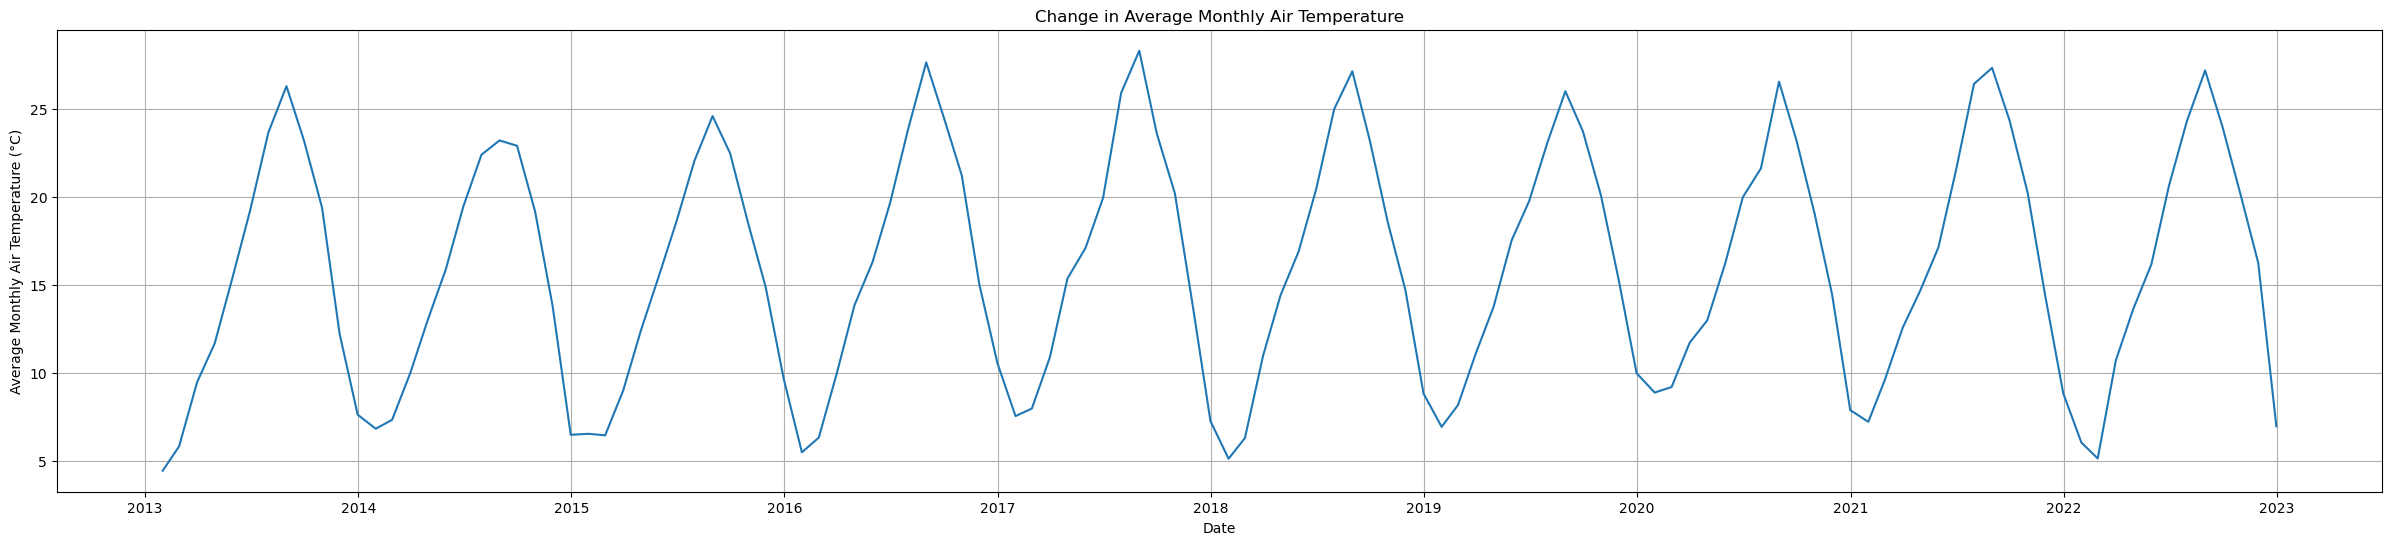

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 6))
plt.plot(monthly_avg_Atemp)
plt.xlabel('Date')
plt.ylabel('Average Monthly Air Temperature (°C)')
plt.title('Change in Average Monthly Air Temperature')
plt.grid(True)
plt.show()

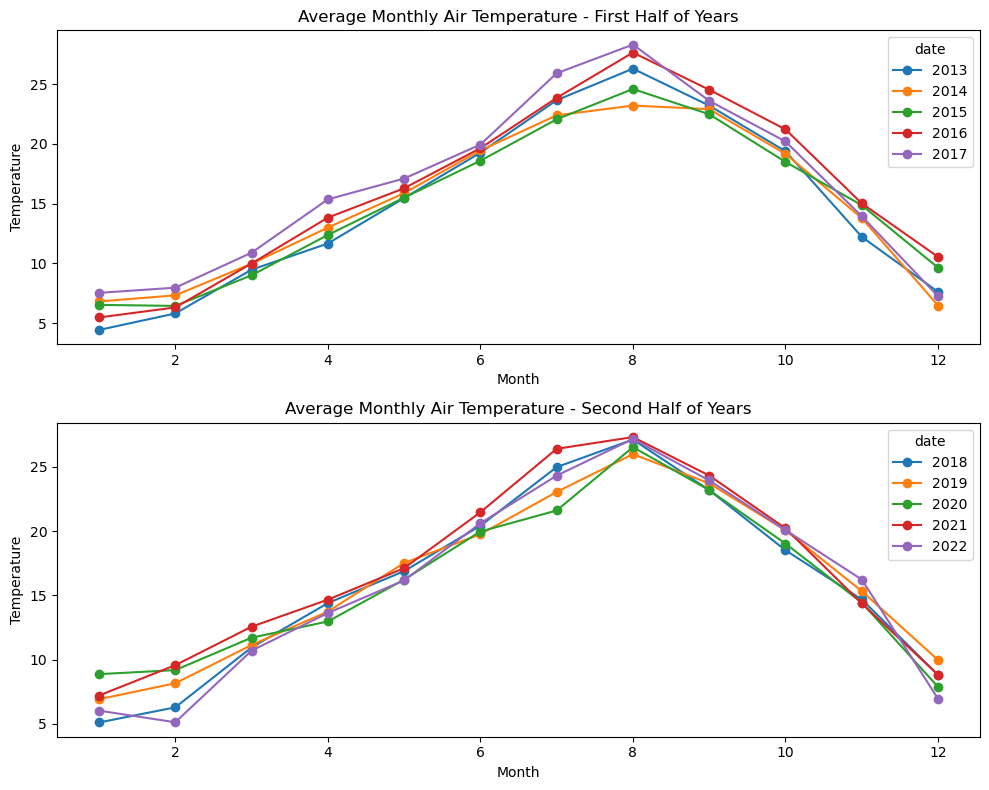

In [9]:
import matplotlib.pyplot as plt

# Group by year and month, and calculate the average temperature
yearly_monthly_avg = df.groupby([df.index.year, df.index.month])['Atemp(°C)'].mean()

# Reshape the data to have years as columns and months as rows
yearly_monthly_avg = yearly_monthly_avg.unstack(level=0)

# Calculate the total number of years
num_years = yearly_monthly_avg.shape[1]

# Calculate the midpoint to divide the years into two groups
midpoint = num_years // 2

# Split the years into two groups
first_half_years = yearly_monthly_avg.iloc[:, :midpoint]
second_half_years = yearly_monthly_avg.iloc[:, midpoint:]

# Create two separate plots for the two groups of years
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Plot the first half of the years
first_half_years.plot(marker='o', linestyle='-', ax=axes[0])
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Temperature')
axes[0].set_title('Average Monthly Air Temperature - First Half of Years')

# Plot the second half of the years
second_half_years.plot(marker='o', linestyle='-', ax=axes[1])
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Temperature')
axes[1].set_title('Average Monthly Air Temperature - Second Half of Years')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()


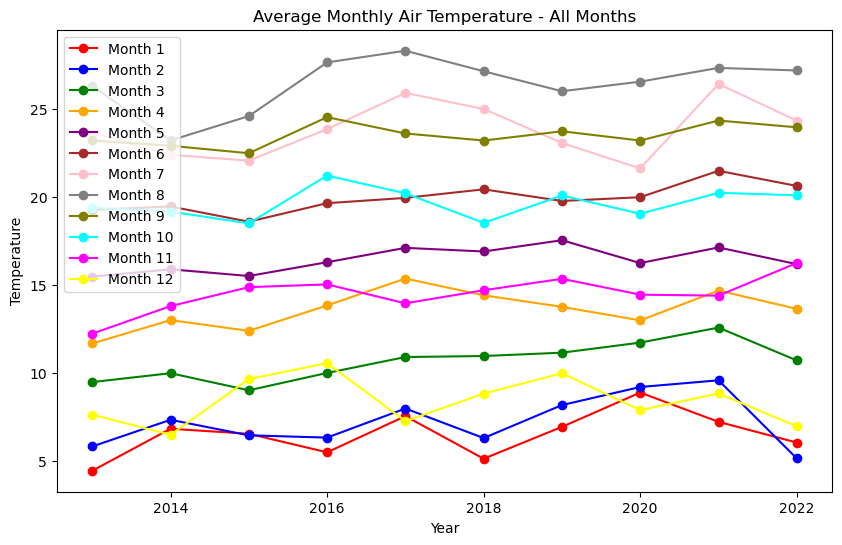

In [10]:

# Define the months and corresponding colors
months = range(1, 13)
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow']

# Create a larger figure
plt.figure(figsize=(10, 6))

# Loop through each month and plot the average monthly water temperature
for i, month in enumerate(months):
    # Filter the data for the specific month
    specific_month_data = df[df.index.month == month]
    
    # Group by year and calculate the average temperature
    yearly_avg_specific_month = specific_month_data.groupby(specific_month_data.index.year)['Atemp(°C)'].mean()
    
    # Plot the average monthly water temperature for the specific month with a different color
    plt.plot(yearly_avg_specific_month.index, yearly_avg_specific_month.values, marker='o', linestyle='-', color=colors[i], label=f'Month {month}')

# Set the x-axis and y-axis labels
plt.xlabel('Year')
plt.ylabel('Temperature')

# Set the title of the graph
plt.title('Average Monthly Air Temperature - All Months')

# Add a legend
plt.legend()

# Display the plot
plt.show()


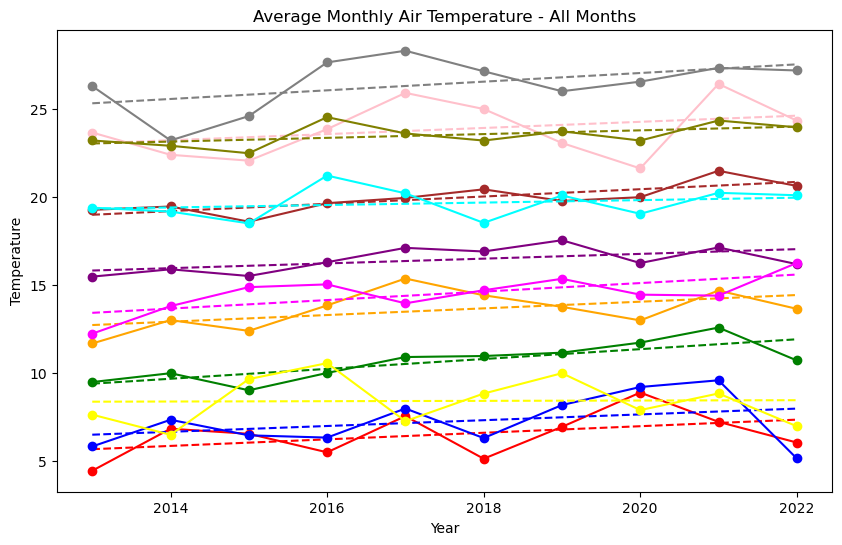

In [11]:

from sklearn.linear_model import LinearRegression

# Define the months and corresponding colors
months = range(1, 13)
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow']

# Create a larger figure
plt.figure(figsize=(10, 6))

# Loop through each month and plot the average monthly water temperature
for i, month in enumerate(months):
    # Filter the data for the specific month
    specific_month_data = df[df.index.month == month]
    
    # Group by year and calculate the average temperature
    yearly_avg_specific_month = specific_month_data.groupby(specific_month_data.index.year)['Atemp(°C)'].mean()
    
    # Plot the average monthly water temperature for the specific month with a different color
    plt.plot(yearly_avg_specific_month.index, yearly_avg_specific_month.values, marker='o', linestyle='-', color=colors[i], label=f'Month {month}')

    # Fit linear regression model to the data
    X = np.array(yearly_avg_specific_month.index).reshape(-1, 1)
    y = yearly_avg_specific_month.values.reshape(-1, 1)
    reg = LinearRegression()
    reg.fit(X, y)
    
    # Predict y values based on the linear regression model
    y_pred = reg.predict(X)
    
    # Plot the linear regression line
    plt.plot(yearly_avg_specific_month.index, y_pred, color=colors[i], linestyle='--')

# Set the x-axis and y-axis labels
plt.xlabel('Year')
plt.ylabel('Temperature')

# Set the title of the graph
plt.title('Average Monthly Air Temperature - All Months')

# Display the plot
plt.show()


Order of trends by prominence:
1. Month 3 - Slope: 0.2804680380798287
2. Month 8 - Slope: 0.2459858249805158
3. Month 11 - Slope: 0.2416962730755832
4. Month 6 - Slope: 0.2076305763202316
5. Month 4 - Slope: 0.18956001393242766
6. Month 1 - Slope: 0.18666689138324283
7. Month 7 - Slope: 0.17469763261086949
8. Month 2 - Slope: 0.16471417471417452
9. Month 5 - Slope: 0.13513435429564463
10. Month 9 - Slope: 0.10655799373040759
11. Month 10 - Slope: 0.0694783978706859
12. Month 12 - Slope: 0.009347856444630645


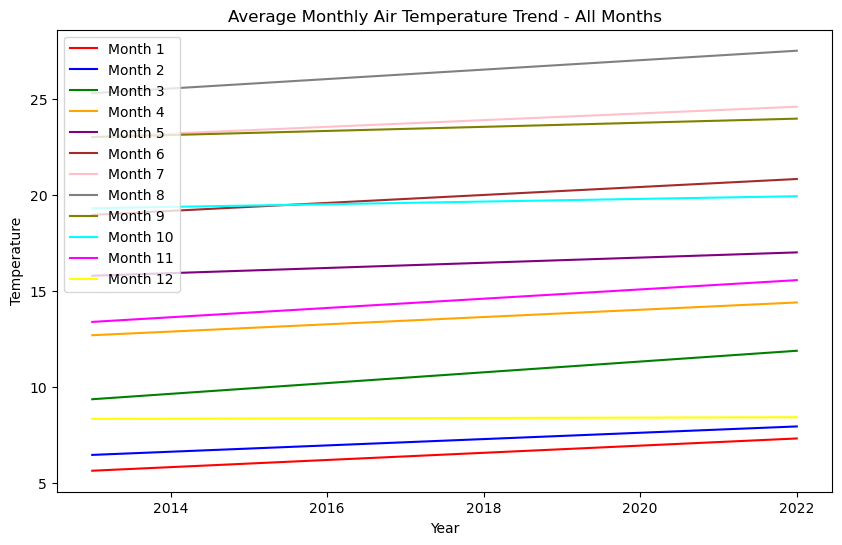

In [12]:

# Define the months and corresponding colors
months = range(1, 13)
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow']

# Create a larger figure
plt.figure(figsize=(10, 6))

# Initialize a dictionary to store the slopes
slopes = {}

# Loop through each month and plot the average monthly water temperature trend
for i, month in enumerate(months):
    # Filter the data for the specific month
    specific_month_data = df[df.index.month == month]
    
    # Group by year and calculate the average temperature
    yearly_avg_specific_month = specific_month_data.groupby(specific_month_data.index.year)['Atemp(°C)'].mean()
    
    # Fit linear regression model to the data
    X = np.array(yearly_avg_specific_month.index).reshape(-1, 1)
    y = yearly_avg_specific_month.values.reshape(-1, 1)
    reg = LinearRegression()
    reg.fit(X, y)
    
    # Predict y values based on the linear regression model
    y_pred = reg.predict(X)
    
    # Plot the average monthly water temperature trend with a different color
    plt.plot(yearly_avg_specific_month.index, y_pred, color=colors[i], linestyle='-', label=f'Month {month}')
    
    # Calculate the slope of the trend line
    slope = reg.coef_[0][0]
    slopes[month] = slope

# Sort the slopes in descending order
sorted_slopes = sorted(slopes.items(), key=lambda x: x[1], reverse=True)

# Display the order of trends by prominence
print("Order of trends by prominence:")
for i, (month, slope) in enumerate(sorted_slopes):
    print(f"{i+1}. Month {month} - Slope: {slope}")

# Set the x-axis and y-axis labels
plt.xlabel('Year')
plt.ylabel('Temperature')

# Set the title of the graph
plt.title('Average Monthly Air Temperature Trend - All Months')

# Add a legend
plt.legend()

# Display the plot
plt.show()


In [13]:
correlation = df['Atemp(°C)'].corr(df['Stemp(°C)'])
print("Correlation between average temperature and average water temperature:", correlation)

Correlation between average temperature and average water temperature: 0.8900777814095281


평균기온과 평균수온의 상관계수는 0.8900777814095281이다. 이 값은 두 변수 사이에 강력한 양의 상관관계가 있음을 나타냅니다. 높은 양의 상관관계는 평균기온이 상승하면 평균 수온도 상승하는 경향이 있고 그 반대의 경우도 있음을 시사합니다. 0.8900777814095281의 상관 계수는 데이터 세트의 평균 온도와 평균 수온 사이에 상대적으로 강한 선형 관계를 나타냅니다.

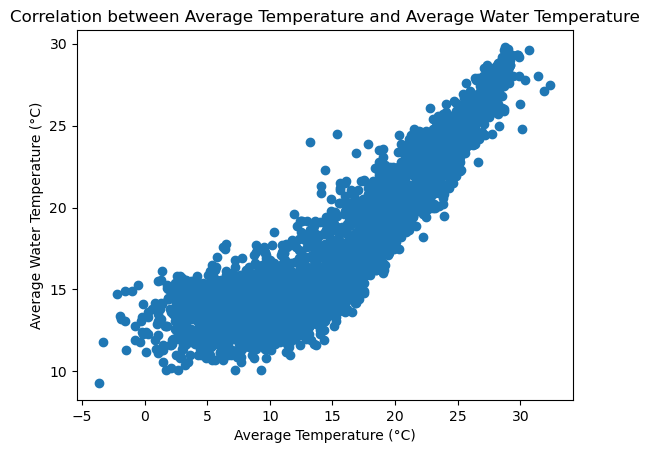

In [14]:
import matplotlib.pyplot as plt

plt.scatter(df['Atemp(°C)'], df['Stemp(°C)'])
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Average Water Temperature (°C)')
plt.title('Correlation between Average Temperature and Average Water Temperature')
plt.show()

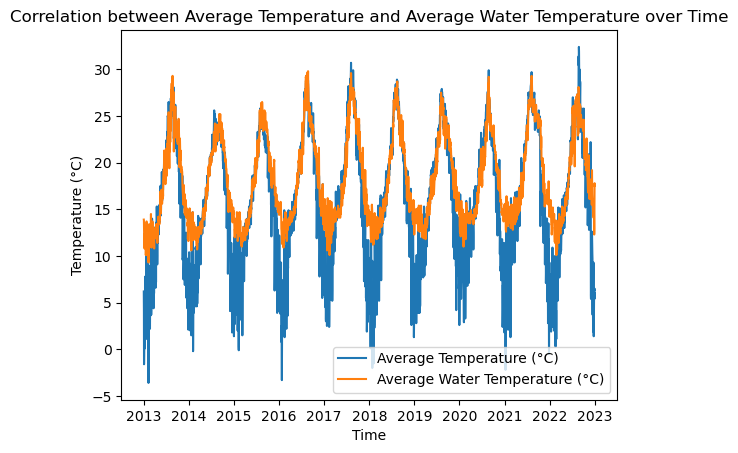

In [15]:
plt.plot(df['Atemp(°C)'], label='Average Temperature (°C)')
plt.plot(df['Stemp(°C)'], label='Average Water Temperature (°C)')
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('Correlation between Average Temperature and Average Water Temperature over Time')
plt.legend()
plt.show()

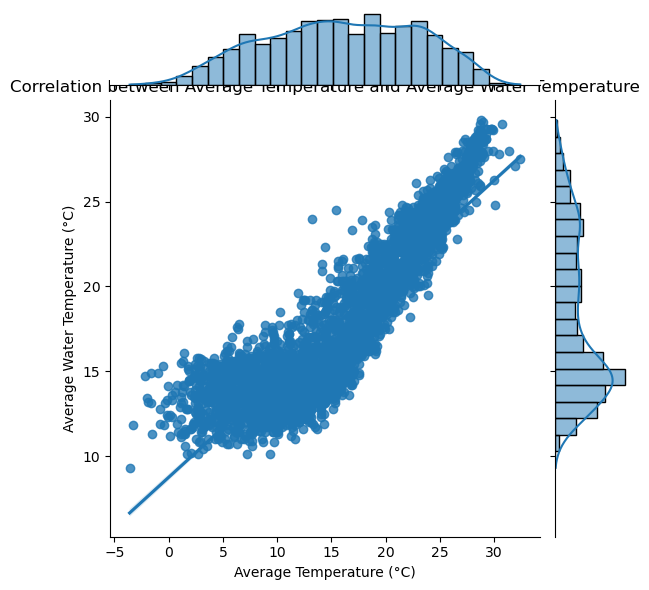

In [16]:
import seaborn as sns

sns.jointplot(x=df['Atemp(°C)'], y=df['Stemp(°C)'], kind='reg')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Average Water Temperature (°C)')
plt.title('Correlation between Average Temperature and Average Water Temperature')
plt.show()

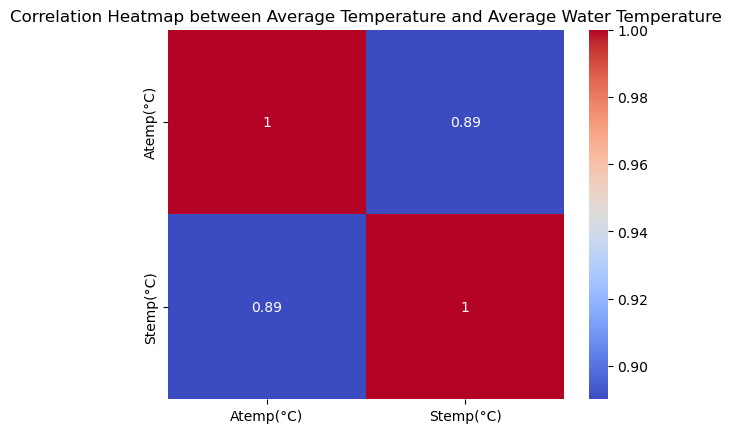

In [17]:
correlation_matrix = df[['Atemp(°C)', 'Stemp(°C)']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap between Average Temperature and Average Water Temperature')
plt.show()